<a href="https://colab.research.google.com/github/dm1706/Assessment_2/blob/main/Assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive; drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
#Read the data set
data_df=pd.read_csv('/content/drive/MyDrive/assignment1.17/diabetic_data.csv')

#View the first few rows of the dataset
print(data_df.head())



   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [ ]:
#Generate descriptive statistics for the dataset
describe_stats=data_df.describe(include='all')
#Dispaly the descriptive statistics
print(describe_stats)
#Display basic informat about the dataset
data_df.info()

        encounter_id   patient_nbr       race  gender      age  weight  \
count   1.017660e+05  1.017660e+05     101766  101766   101766  101766   
unique           NaN           NaN          6       3       10      10   
top              NaN           NaN  Caucasian  Female  [70-80)       ?   
freq             NaN           NaN      76099   54708    26068   98569   
mean    1.652016e+08  5.433040e+07        NaN     NaN      NaN     NaN   
std     1.026403e+08  3.869636e+07        NaN     NaN      NaN     NaN   
min     1.252200e+04  1.350000e+02        NaN     NaN      NaN     NaN   
25%     8.496119e+07  2.341322e+07        NaN     NaN      NaN     NaN   
50%     1.523890e+08  4.550514e+07        NaN     NaN      NaN     NaN   
75%     2.302709e+08  8.754595e+07        NaN     NaN      NaN     NaN   
max     4.438672e+08  1.895026e+08        NaN     NaN      NaN     NaN   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count       101766.000000          

In [ ]:
#Replace'?'with NaN for easier handling of
data_df.replace('?',pd.NA,inplace=True)

#Analyze missing values in the dataset
missing_values = data_df.isnull().sum()

#Display the missing values for each column
missing_values[missing_values > 0]

#Generate summary statistic for numeric columns
summary_stastic = data_df.describe()

#Display the summary statistics
print(missing_values,summary_stastic)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

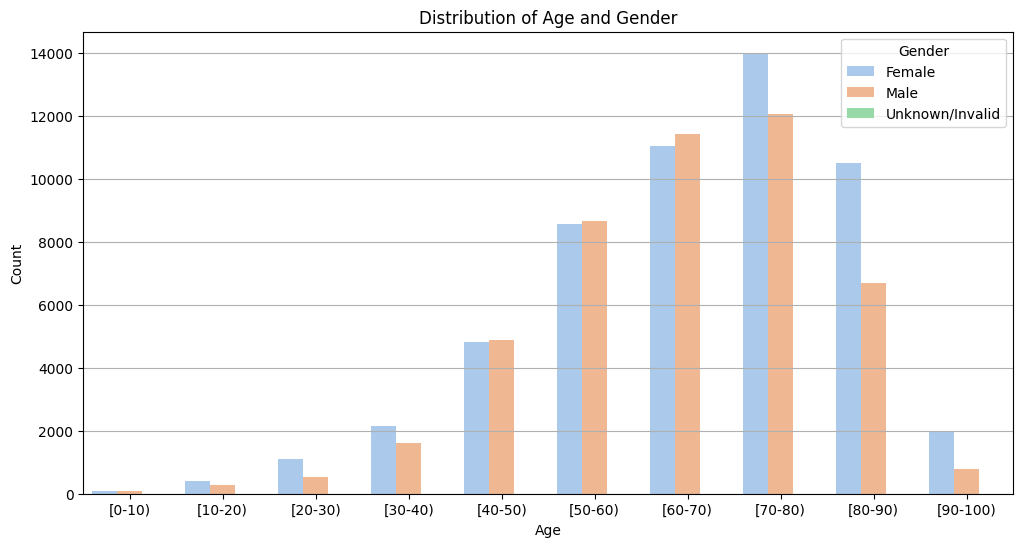

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("husl")
#Convert age groups into ordered categories
age_order = ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
data_df['age'] = pd.Categorical(data_df['age'], categories=age_order, ordered=True)

#the distribution of age and gender
plt.figure(figsize=(12,6))
sns.countplot(x='age', hue='gender', data=data_df,palette='pastel')
plt.title('Distribution of Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.grid(axis='y')

plt.show()

<ipython-input-8-b19aace2096d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=hue, data=data_df, order=data_df[hue].value_counts().index, palette='pastel')


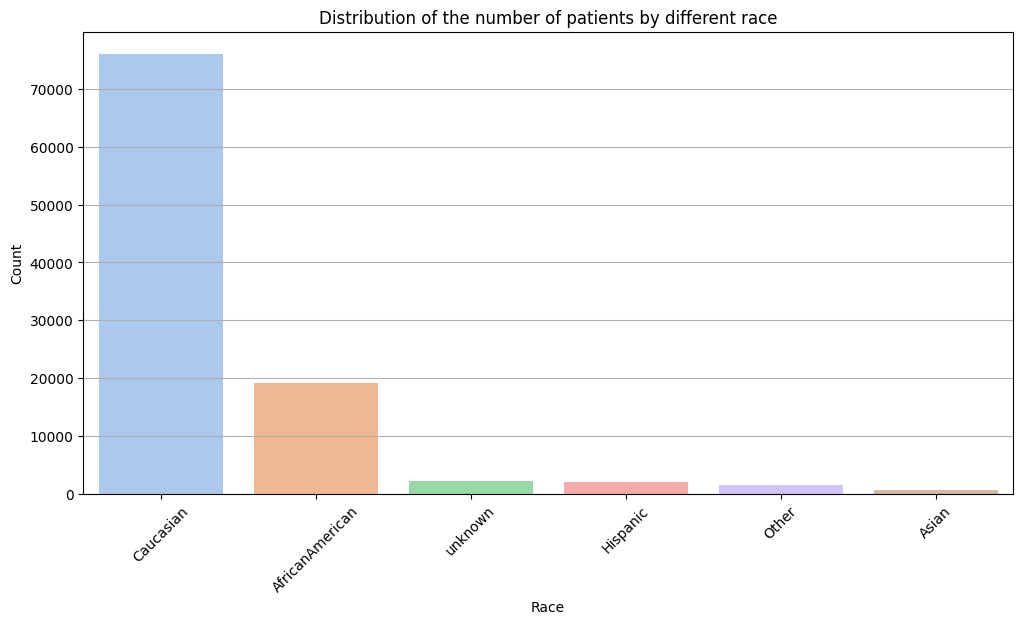

In [ ]:
# Handling Missing Values
data_df.replace('\?', 'unknown',regex=True,inplace=True)
# Distribution of number of patients by different race
plt.figure(figsize=(12,6))
hue='race'
sns.countplot(x=hue, data=data_df, order=data_df[hue].value_counts().index, palette='pastel')
plt.title('Distribution of the number of patients by different race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

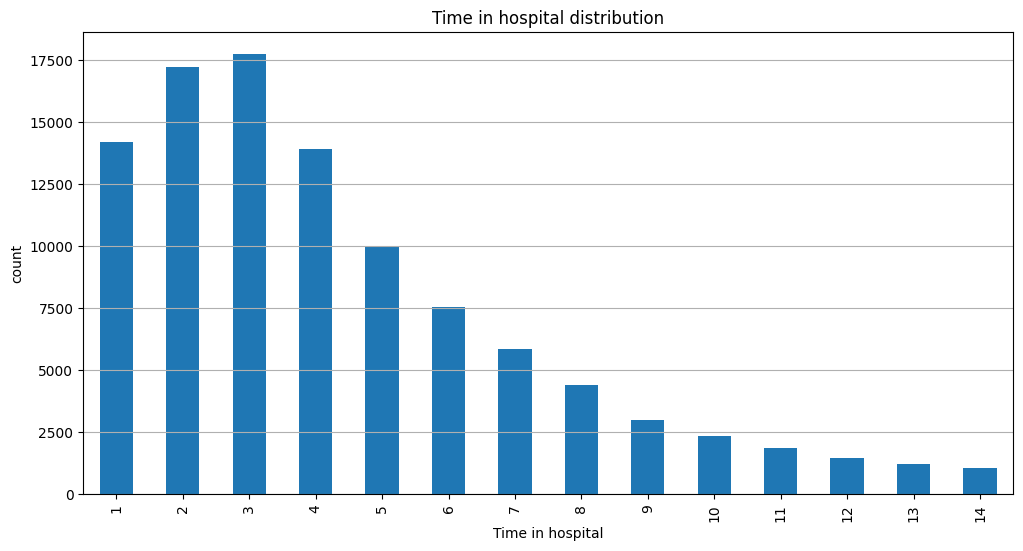

In [ ]:
#Distribution of time in hospital
plt.figure(figsize=(12, 6))
data_df['time_in_hospital'].value_counts().sort_index().plot(kind='bar')
plt.title('Time in hospital distribution')
plt.xlabel('Time in hospital')
plt.ylabel('count')
plt.grid(axis='y')
plt.show()


<ipython-input-15-d060f21d19b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_df,x='age',y='time_in_hospital', palette='pastel')


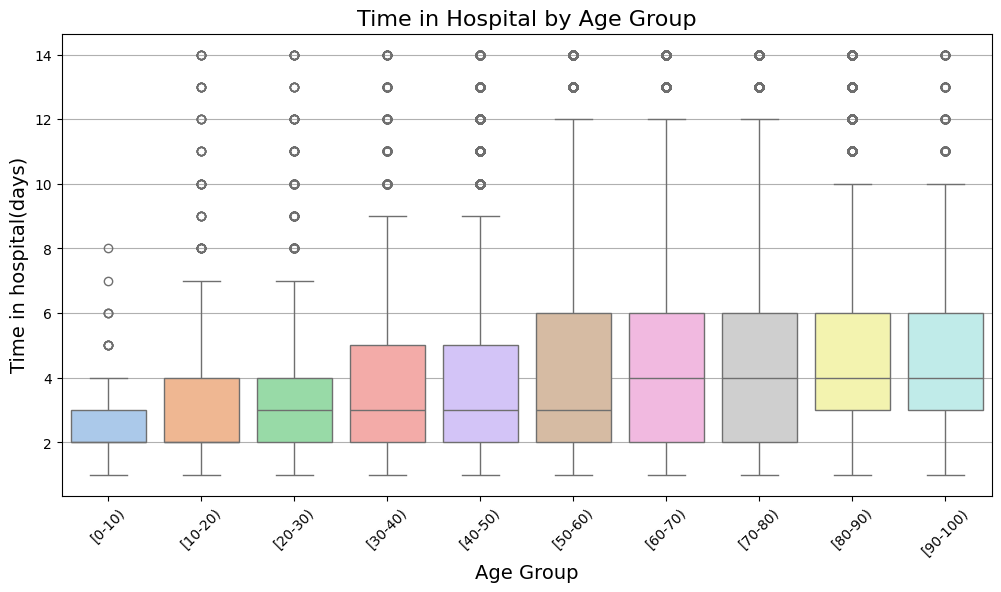

In [ ]:
# Time in Hospital by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_df,x='age',y='time_in_hospital', palette='pastel')
plt.title('Time in Hospital by Age Group',fontsize=16)
plt.xlabel('Age Group',fontsize=14)
plt.ylabel('Time in hospital(days)',fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

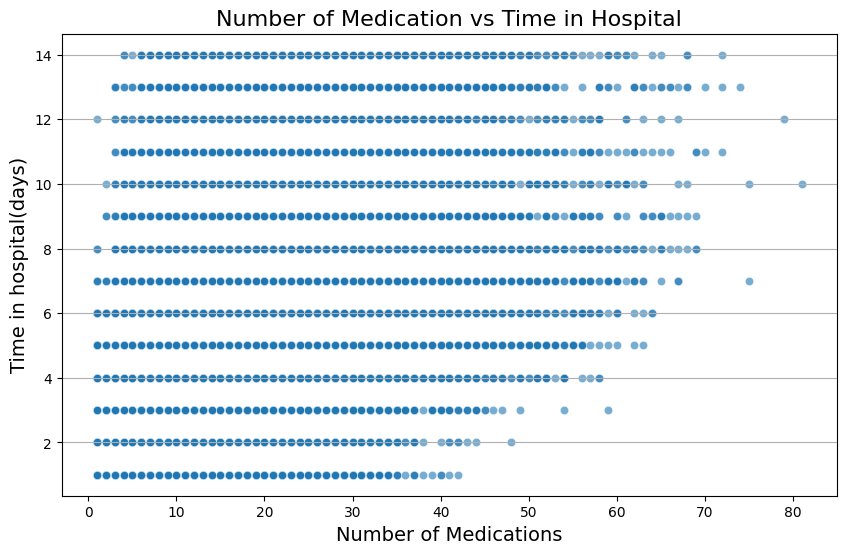

In [ ]:
# Number of Medication vs Time in Hospital
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='num_medications', y='time_in_hospital', alpha=0.6)
plt.title('Number of Medication vs Time in Hospital',fontsize=16)
plt.xlabel('Number of Medications',fontsize=14)
plt.ylabel('Time in hospital(days)',fontsize=14)
plt.grid(axis='y')
plt.show()

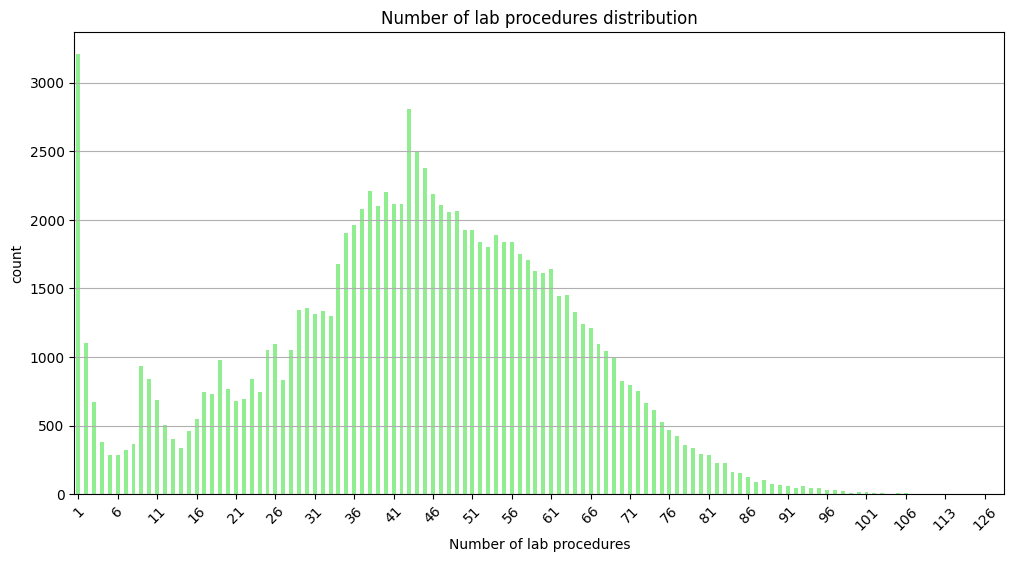

In [ ]:
#Number of lab procedures distribution
plt.figure(figsize=(12, 6))
data_df['num_lab_procedures'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Number of lab procedures distribution')
plt.xlabel('Number of lab procedures')
plt.ylabel('count')
plt.xticks(ticks=range(0, len(data_df['num_lab_procedures'].value_counts()), 5), rotation=45)
plt.grid(axis='y')
plt.show()

<ipython-input-56-c2e53ae69b1b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_meds_by_age = data_df.groupby('age')['num_medications'].mean().round(2)


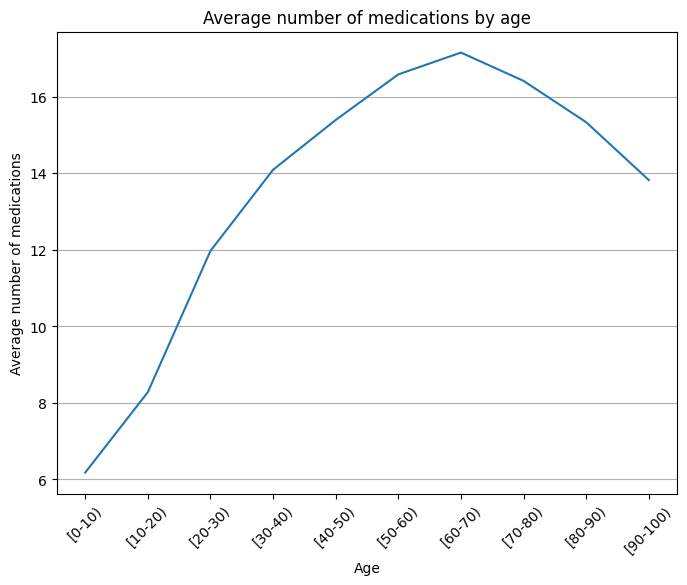

In [ ]:
# Calculate the average number of medications used in different age groups and keep to two decimal places
avg_meds_by_age = data_df.groupby('age')['num_medications'].mean().round(2)
#Average number of medications by age
plt.figure(figsize=(8,6))
plt.plot(avg_meds_by_age.index,avg_meds_by_age.values)
plt.title('Average number of medications by age')
plt.xlabel('Age')
plt.ylabel('Average number of medications')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()